<a href="https://colab.research.google.com/github/Anshikadude/EDA-/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
#**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
#**Explore and analyze the data to discover important factors that govern the bookings.**


# Importing the libraries.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the CSV file and converting it to DataFrame

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Exploration

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 32)

#Data Description:

**1.hotel :** Hotel(Resort Hotel or City Hotel)

**2.is_canceled :** Value indicating if the booking was canceled (1) or not (0)

**3.lead_time :** * Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

**4.arrival_date_year :** Year of arrival date

**5.arrival_date_month :** Month of arrival date

**6.arrival_date_week_number :** Week number of year for arrival date

**7.arrival_date_day_of_month :** Day of arrival date

**8.stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9.stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10.adults :** Number of adults

**11.children :** Number of children

**12.babies :** Number of babies

**13.meal :** Type of meal booked. Categories are presented in standard hospitality meal packages:

**14.country :** Country of origin.`

**15.market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16.distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17.is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**18.previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**19.previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**20.reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21.assigned_room_type :** Code for the type of room assigned to the booking.

**22.booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23.deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**24.agent :** ID of the travel agency that made the booking

**25.company :** ID of the company/entity that made the booking or responsible for paying the booking.

**26.days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**27.customer_type :** Type of booking, assuming one of four categories

**28.adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**29.required_car_parking_spaces :** Number of car parking spaces required by the customer

**30.total_of_special_requests :** * Number of special requests made by the customer (e.g. twin bed or high floor)*

**31.reservation_status :** Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
**32.reservation_status_date :** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

#Data cleaning

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
def df_clean(df):
  df.fillna(0,inplace = True)
  print(df.isnull().sum())

In [ ]:
df_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# EDA (Exploratory Data Analysis

*   **Univariate Analysis**




#1.Which type of hotel does a customer book in general? 

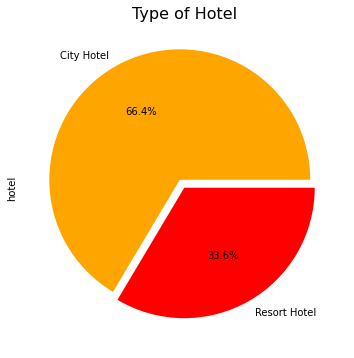

In [ ]:
plt.figure(figsize = (6,6))
explode =[0.07,0]
colors = ['orange','red']
gen = df['hotel'].value_counts().plot(kind = 'pie',autopct = '%.1f%%', explode = explode , colors = colors)
plt.title('Type of Hotel', fontsize = 16)
plt.show()

#2.Which year most of customer arrive?

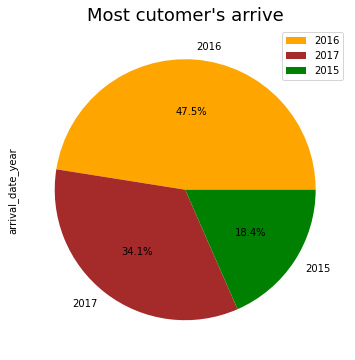

In [ ]:
plt.figure(figsize = (6,6))
plt.title('''Most cutomer's arrive''', fontsize = 18)
colors = ['orange','brown','green']
df['arrival_date_year'].value_counts().plot(kind = 'pie', autopct = '%.1f%%',colors = colors)
plt.legend()


# 3.Which are the busiest months in the year of hotel booking?

Text(0.5, 1.0, 'Busiest months in the year of hotel booking')

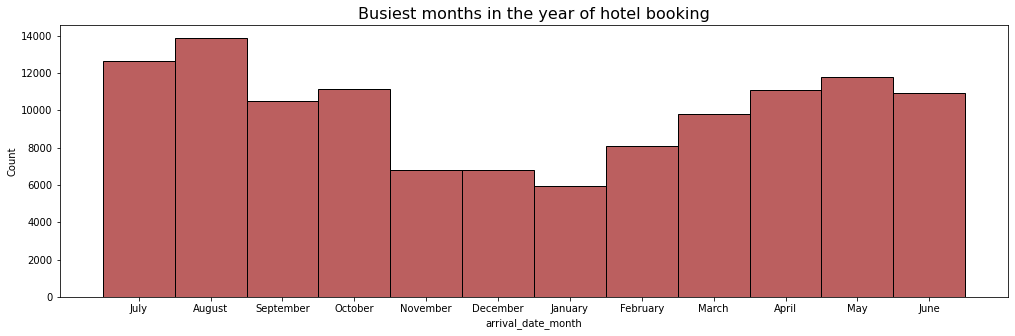

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.histplot(df['arrival_date_month'], color = 'brown',ax=ax)
plt.title('Busiest months in the year of hotel booking', size = 16)

# 4.How many bookings were cancelled?

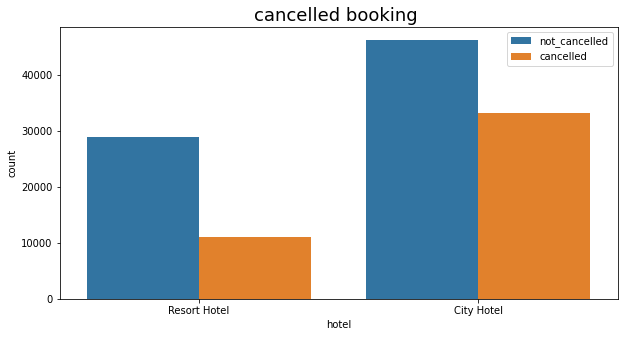

In [ ]:
plt.figure(figsize = (10,5))
plt.title('cancelled booking ', fontsize = 18)

sns.countplot(data = df , x='hotel' , hue = 'is_canceled' )
plt.legend(['not_cancelled','cancelled'])

# 5.From which country most guest arrive?

Text(0.5, 1.0, 'Most guest arrived')

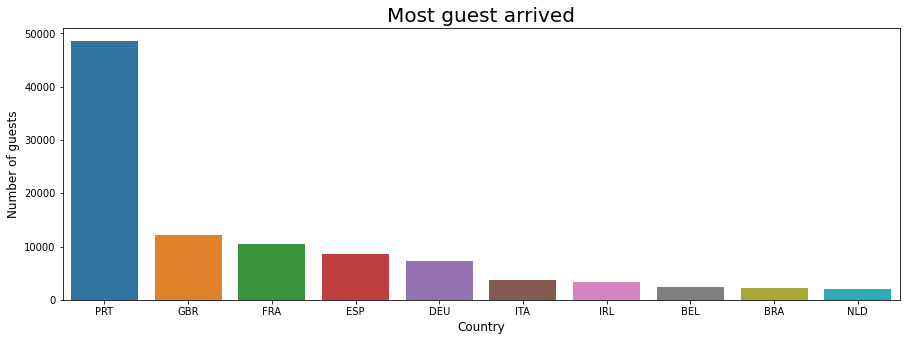

In [ ]:
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
plt.figure(figsize =(15,5) )
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of guests',fontsize=12)
plt.title('Most guest arrived', fontsize = 20)


# 6.How customer booked their hotel from market segment?

Text(0.5, 1.0, 'Customer booked from market segment')

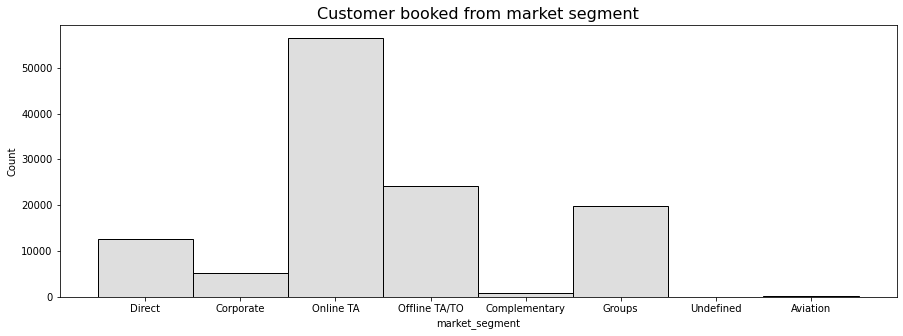

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['market_segment'],ax=ax,color = 'lightgrey')
plt.title('Customer booked from market segment', size = 16)

# 7. How many customers were stays in week nights and booking changes?

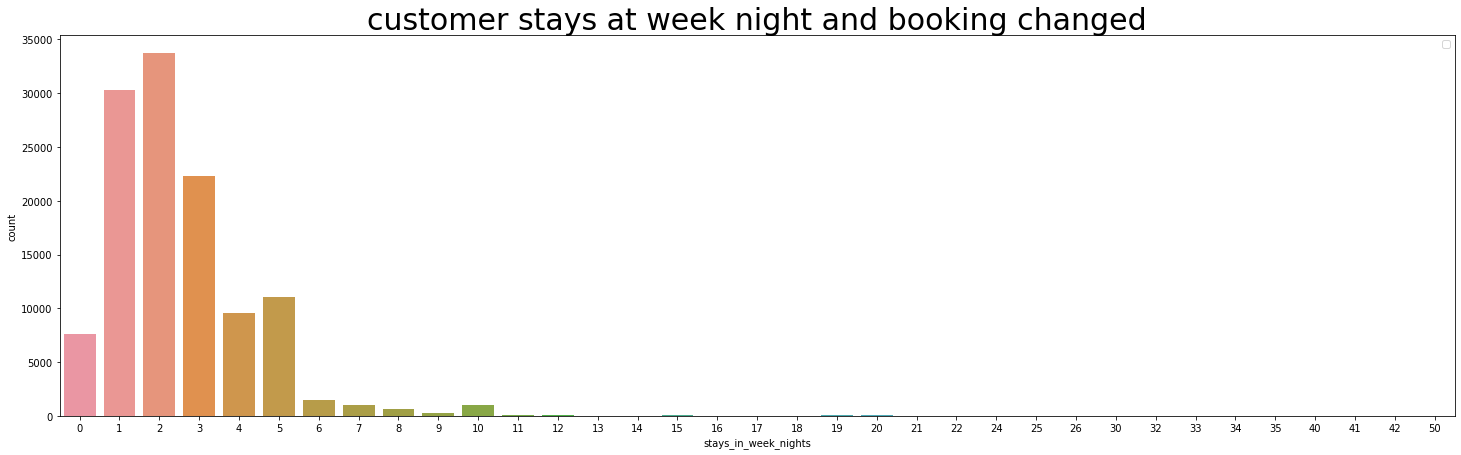

In [ ]:
s=df.sort_values(by= ['stays_in_week_nights','booking_changes'])
fig, ax = plt.subplots(figsize=(25, 7))
sns.countplot(data = s, x='stays_in_week_nights', ax = ax)
plt.title('customer stays at week night and booking changed', size = 30)
plt.legend()

# 8. How many repeated customers?

Text(0.5, 1.0, "Repeated custome's")

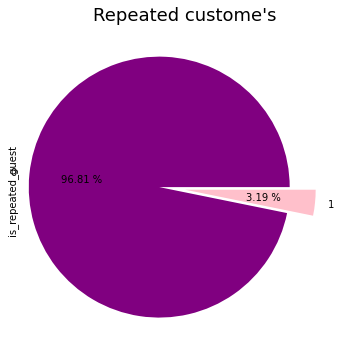

In [ ]:
explode = [0.2,0]
plt.figure(figsize=(6,6))
colors = ['purple','pink']
re=df['is_repeated_guest'].value_counts().plot(kind='pie', autopct = '%.2f %%',explode = explode, colors = colors)
plt.title("Repeated custome's", fontsize = 18)

# 9. Deposite type payment of customer?

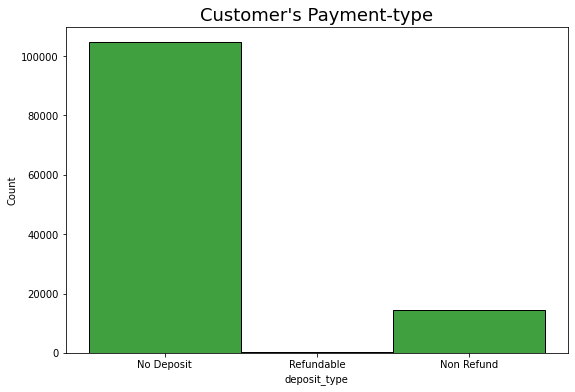

In [ ]:
x=list(df['deposit_type'].unique())
fig, ax = plt.subplots(figsize=(9, 6))
sns.histplot(df['deposit_type'],ax=ax , color = 'green')
plt.title("Customer's Payment-type", size = 18)

# 10. Correlation of dataset?

Text(0.5, 1.0, 'Co-relation of the columns')

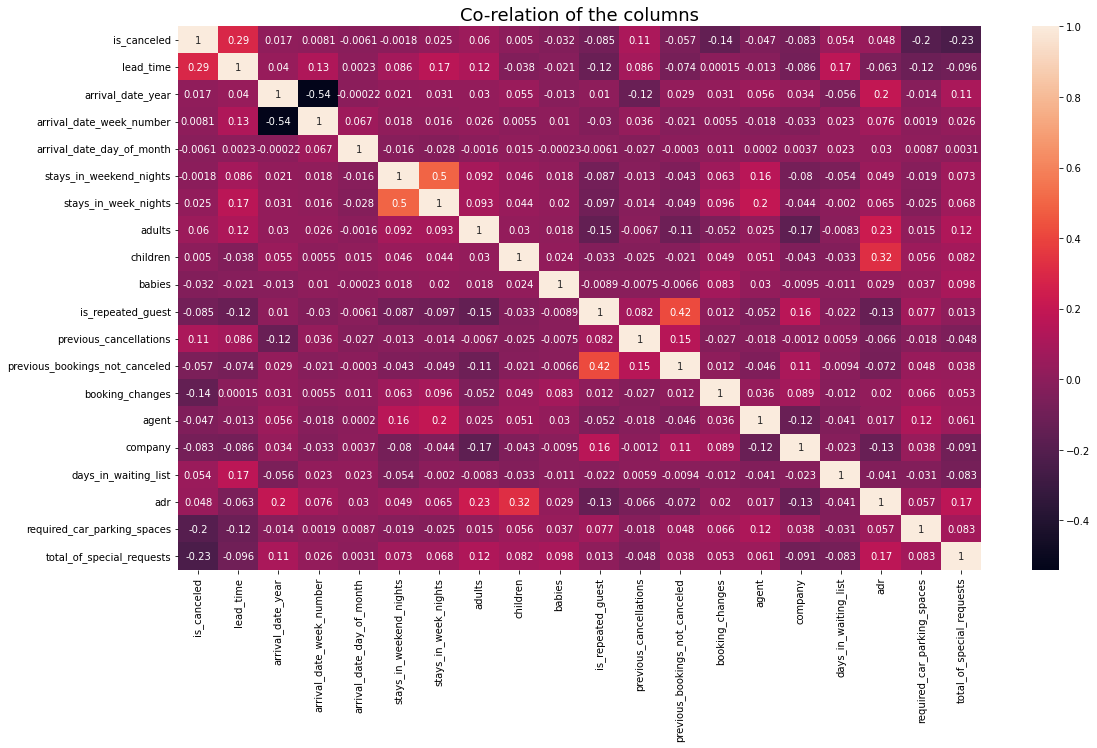

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns', fontsize = 18)